## 1. Setup Notebook & Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Load & Explore Dataset

In [2]:
features = pd.read_csv('Downloads/features.csv')
stores = pd.read_csv('Downloads/stores.csv')
test = pd.read_csv('Downloads/test.csv')
train = pd.read_csv('Downloads/train.csv')

In [3]:
features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [4]:
stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [5]:
test.head()

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

In [6]:
train.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

Now it's time to merge some of the data sets together. Store is a primary key on them all so that is what will be used to join them. I want to join the train, stores and features table together.


In [7]:
# Start with train since it has Store, Dept, Date
train_df = pd.merge(train, stores, on="Store")
train_df = pd.merge(train_df, features, on=["Store", "Date"])

In [8]:
train_df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1  2010-02-05      24924.50        False    A  151315   
1      1     2  2010-02-05      50605.27        False    A  151315   
2      1     3  2010-02-05      13740.12        False    A  151315   
3      1     4  2010-02-05      39954.04        False    A  151315   
4      1     5  2010-02-05      32229.38        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        NaN        NaN        NaN        NaN   
1        42.31       2.572        NaN        NaN        NaN        NaN   
2        42.31       2.572        NaN        NaN        NaN        NaN   
3        42.31       2.572        NaN        NaN        NaN        NaN   
4        42.31       2.572        NaN        NaN        NaN        NaN   

   MarkDown5         CPI  Unemployment  IsHoliday_y  
0        NaN  211.096358         8.106        False  
1        NaN  211.096358         8.106        False  
2        NaN  211.096358         8.106        False  
3        NaN  211.096358         8.106        False  
4        NaN  211.096358         8.106        False

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [10]:
train_df.describe()

Store           Dept   Weekly_Sales           Size  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123  136727.915739   
std        12.785297      30.492054   22711.183519   60980.583328   
min         1.000000       1.000000   -4988.940000   34875.000000   
25%        11.000000      18.000000    2079.650000   93638.000000   
50%        22.000000      37.000000    7612.030000  140167.000000   
75%        33.000000      74.000000   20205.852500  202505.000000   
max        45.000000      99.000000  693099.360000  219622.000000   

         Temperature     Fuel_Price      MarkDown1      MarkDown2  \
count  421570.000000  421570.000000  150681.000000  111248.000000   
mean       60.090059       3.361027    7246.420196    3334.628621   
std        18.447931       0.458515    8291.221345    9475.357325   
min        -2.060000       2.472000       0.270000    -265.760000   
25%        46.680000       2.933000    2240.270000      41.600000   
50%        62.090000       3.452000    5347.450000     192.000000   
75%        74.280000       3.738000    9210.900000    1926.940000   
max       100.140000       4.468000   88646.760000  104519.540000   

           MarkDown3      MarkDown4      MarkDown5            CPI  \
count  137091.000000  134967.000000  151432.000000  421570.000000   
mean     1439.421384    3383.168256    4628.975079     171.201947   
std      9623.078290    6292.384031    5962.887455      39.159276   
min       -29.100000       0.220000     135.160000     126.064000   
25%         5.080000     504.220000    1878.440000     132.022667   
50%        24.600000    1481.310000    3359.450000     182.318780   
75%       103.990000    3595.040000    5563.800000     212.416993   
max    141630.610000   67474.850000  108519.280000     227.232807   

        Unemployment  
count  421570.000000  
mean        7.960289  
std         1.863296  
min         3.879000  
25%         6.891000  
50%         7.866000  
75%         8.572000  
max        14.313000

In [11]:
train_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [12]:
train_df.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday_x          2
Type                 3
Size                40
Temperature       3528
Fuel_Price         892
MarkDown1         2277
MarkDown2         1499
MarkDown3         1662
MarkDown4         1944
MarkDown5         2293
CPI               2145
Unemployment       349
IsHoliday_y          2
dtype: int64

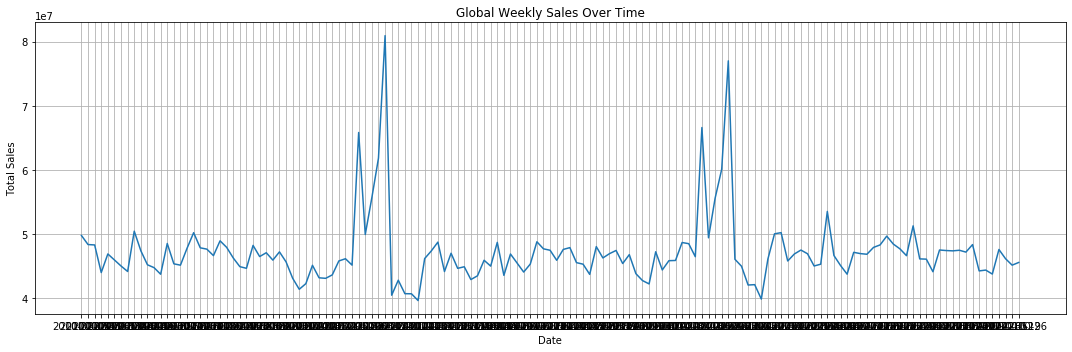

In [13]:
# Aggregate total weekly sales across all stores
global_sales = train_df.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(15, 5))
plt.plot(global_sales.index, global_sales.values)
plt.title("Global Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


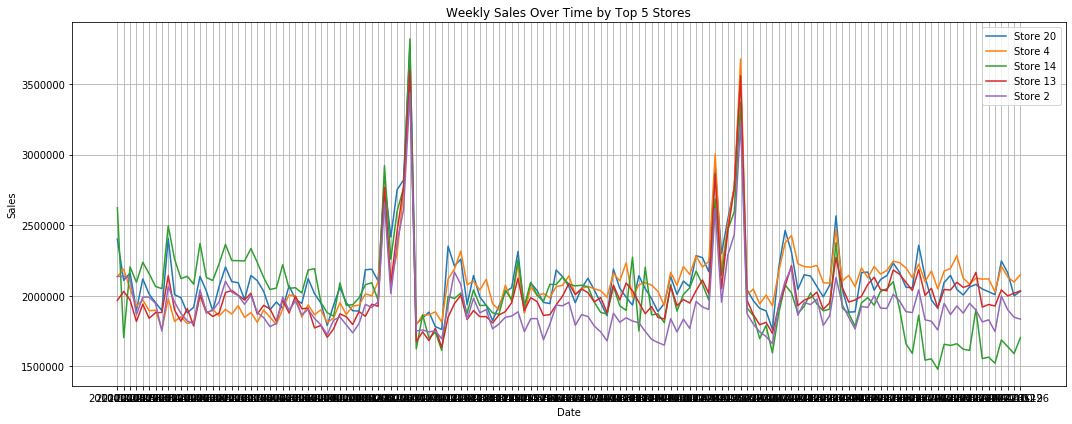

In [14]:
# Pick a few stores to compare (optional: top 5 by total sales)
top_stores = train_df.groupby('Store')['Weekly_Sales'].sum().nlargest(5).index

plt.figure(figsize=(15, 6))
for store in top_stores:
    store_sales = train_df[train_df['Store'] == store].groupby('Date')['Weekly_Sales'].sum()
    plt.plot(store_sales.index, store_sales.values, label=f'Store {store}')

plt.title("Weekly Sales Over Time by Top 5 Stores")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


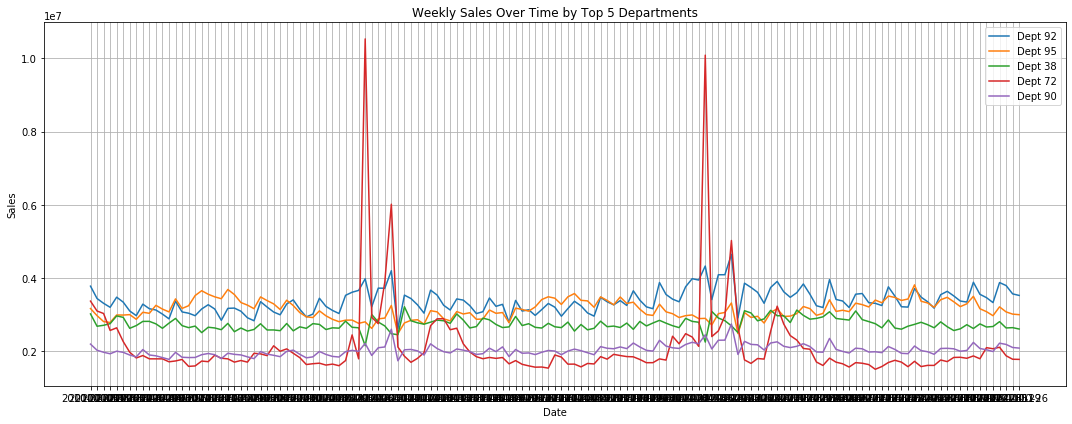

In [15]:
# Pick a few departments to compare (optional: top 5)
top_depts = train_df.groupby('Dept')['Weekly_Sales'].sum().nlargest(5).index

plt.figure(figsize=(15, 6))
for dept in top_depts:
    dept_sales = train_df[train_df['Dept'] == dept].groupby('Date')['Weekly_Sales'].sum()
    plt.plot(dept_sales.index, dept_sales.values, label=f'Dept {dept}')

plt.title("Weekly Sales Over Time by Top 5 Departments")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
import plotly.express as px

fig = px.line(global_sales.reset_index(), x='Date', y='Weekly_Sales',
              title="Global Weekly Sales Over Time", labels={"Weekly_Sales": "Total Sales"})
fig.update_xaxes(rangeslider_visible=True)
fig.show()


In [17]:
top_stores = train_df.groupby('Store')['Weekly_Sales'].sum().nlargest(5).index
store_subset = train_df[train_df['Store'].isin(top_stores)]

fig = px.line(store_subset, x='Date', y='Weekly_Sales', color='Store',
              title='Weekly Sales Over Time for Top 5 Stores',
              labels={"Weekly_Sales": "Sales", "Date": "Date"})
fig.update_xaxes(rangeslider_visible=True)
fig.show()



In [18]:
top_depts = train_df.groupby('Dept')['Weekly_Sales'].sum().nlargest(5).index
dept_subset = train_df[train_df['Dept'].isin(top_depts)]

fig = px.line(dept_subset, x='Date', y='Weekly_Sales', color='Dept',
              title='Weekly Sales Over Time for Top 5 Departments',
              labels={"Weekly_Sales": "Sales", "Date": "Date"})
fig.update_xaxes(rangeslider_visible=True)
fig.show()


## Feature Engineering

Now I want to add columns that help models capture trends, seasonality, and external influences.
Must-haves:

Year, Month, Week, DayOfWeek from Date

IsHoliday (already exists, but verify binary)

Lag features: previous week's sales (lag_1), 4-week rolling average

Store-level features: type, size

External features: Fuel Price, CPI, Unemployment, etc.

In [19]:
# Checking to see what column attribute Date has
print(train_df['Date'].dtype)

object


In [20]:
#Converting the Date column from an object tp a date time 
train_df['Date'] = pd.to_datetime(train_df['Date'], errors='coerce')

In [21]:
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Week'] = train_df['Date'].dt.isocalendar().week
train_df['DayOfWeek'] = train_df['Date'].dt.dayofweek

In [22]:
train_df = train_df.sort_values(['Store', 'Dept', 'Date'])

# Lag and rolling average for each Store-Dept
train_df['lag_1'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
train_df['rolling_mean_4'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1).rolling(window=4).mean()


In [23]:
for col in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    train_df[col + '_missing'] = train_df[col].isna().astype(int)
    train_df[col] = train_df[col].fillna(0)


## Modeling & Forecasting Stage

In [24]:
# Use last few weeks as validation
cutoff_date = "2012-06-01"
train_data = train_df[train_df['Date'] < cutoff_date]
val_data   = train_df[train_df['Date'] >= cutoff_date]

In [25]:
print(train_df['Type'].unique())

['A' 'B' 'C']


print(train_df[features].dtypes)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

features = ['Store', 'Dept', 'Size', 'Type',
    'Year', 'Month', 'Week', 'DayOfWeek', 'IsHoliday_x','IsHoliday_y',
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
    'MarkDown1_missing', 'MarkDown2_missing', 'MarkDown3_missing',
    'MarkDown4_missing', 'MarkDown5_missing',
    'Fuel_Price', 'CPI', 'Unemployment',
    'lag_1', 'rolling_mean_4']

# Select features
X_train = train_data[features].copy()
X_val = val_data[features].copy()

# Replace inf/-inf with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_val.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaNs with 0 (or use .median() for better modeling)
X_train.fillna(0, inplace=True)
X_val.fillna(0, inplace=True)

# Target variable
y_train = train_data['Weekly_Sales']
y_val = val_data['Weekly_Sales']

# Model
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_val)

# Evaluate
rmse = mean_squared_error(y_val, preds, squared=False)
print("Baseline RMSE:", rmse)



Baseline RMSE: 3355.8959792748483


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features
features = ['Store', 'Dept', 'Size', 'Type',
    'Year', 'Month', 'Week', 'DayOfWeek', 'IsHoliday_x','IsHoliday_y',
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
    'MarkDown1_missing', 'MarkDown2_missing', 'MarkDown3_missing',
    'MarkDown4_missing', 'MarkDown5_missing',
    'Fuel_Price', 'CPI', 'Unemployment',
    'lag_1', 'rolling_mean_4']

# Select features
X_train = train_data[features]
y_train = train_data['Weekly_Sales']
X_val = val_data[features]
y_val = val_data['Weekly_Sales']

# Clean NaNs or infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
X_val = X_val.replace([np.inf, -np.inf], np.nan).dropna()

# Align y values with cleaned X
y_train = y_train.loc[X_train.index]
y_val = y_val.loc[X_val.index]

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
preds = model.predict(X_val)
rmse = mean_squared_error(y_val, preds, squared=False)
print("Baseline RMSE:", rmse)



Baseline RMSE: 3379.576522224566


In [44]:
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_val)
rmse = mean_squared_error(y_val, preds, squared=False)
print("Baseline RMSE:", rmse)


Baseline RMSE: 3379.576522224566


non_numeric_cols = X_train.select_dtypes(exclude=['int64', 'float64', 'int32', 'uint32']).columns
print("Non-numeric columns:", non_numeric_cols.tolist())


print(train_df.columns)

In [45]:
#Tree Based Model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)

rf_rmse = mean_squared_error(y_val, rf_preds, squared=False)
print("Random Forest RMSE:", rf_rmse)


Random Forest RMSE: 3034.5677158362428


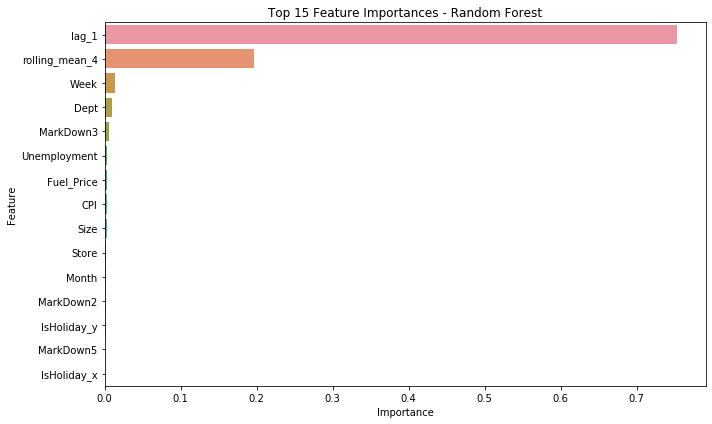

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
feature_names = X_train.columns
feat_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_df.head(15))
plt.title("Top 15 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()


In [51]:
# 1. Add 'source' column to identify test/train
train_data['source'] = 'train'
test_data_prepared['source'] = 'test'

# 2. Add placeholder for target column in test set
test_data_prepared['Weekly_Sales'] = np.nan

# 3. Combine both sets
combined = pd.concat([train_data, test_data_prepared], ignore_index=True)

# 4. Sort by Store, Dept, Date (this is critical for time-based lags)
combined = combined.sort_values(by=["Store", "Dept", "Date"])

# 5. Recalculate lag and rolling features
combined['lag_1'] = combined.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
combined['rolling_mean_4'] = combined.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1).rolling(window=4).mean().reset_index(0, drop=True)

# 6. After feature engineering, split back to test set
test_data_prepared = combined[combined['source'] == 'test'].copy()

# 7. Drop helper columns
test_data_prepared = test_data_prepared.drop(columns=['source', 'Weekly_Sales'])

# 8. Now select features (should work)
X_test = test_data_prepared[features].copy()
X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()

# 9. Align and predict
test_df_cleaned = test_data_prepared.loc[X_test.index].copy()
test_preds = model.predict(X_test)
submission = test_df_cleaned.copy()
submission['Weekly_Sales_Pred'] = test_preds

# 10. View
print(submission[["Store", "Dept", "Date", "Weekly_Sales_Pred"]].head())


C:\Users\rseal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



        Store  Dept       Date  Weekly_Sales_Pred
356489      1     1 2012-11-02       11445.815324
356528      1     2 2012-11-02       19786.562811
356567      1     3 2012-11-02        9907.055194
356645      1     5 2012-11-02        7933.886114
356684      1     6 2012-11-02        4255.850902


In [53]:
print(submission[["Store", "Dept", "Date", "Weekly_Sales_Pred"]].head())


        Store  Dept       Date  Weekly_Sales_Pred
356489      1     1 2012-11-02       11445.815324
356528      1     2 2012-11-02       19786.562811
356567      1     3 2012-11-02        9907.055194
356645      1     5 2012-11-02        7933.886114
356684      1     6 2012-11-02        4255.850902
